# SABR Model for Interest Rates

We examine the SABR model

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
from financepy.finutils import *
from financepy.models.FinModelSABR import *
from financepy.models.FinModelSABRShifted import *

## SABR Model

I examine the volatility as a function of strike

In [66]:
strikes = np.linspace(0.01, 0.10, 100)

In [67]:
f = 0.032

In [68]:
texp = 2.0

In [69]:
alpha = 0.174; beta = 1.0; rho = -0.90; nu = 0.817

In [70]:
model = FinModelSABR(alpha, beta, rho, nu)

In [71]:
model

OBJECT TYPE: FinModelSABR
Alpha: 0.174
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [72]:
volsSABR = model.blackVol(f, strikes, texp) * 100

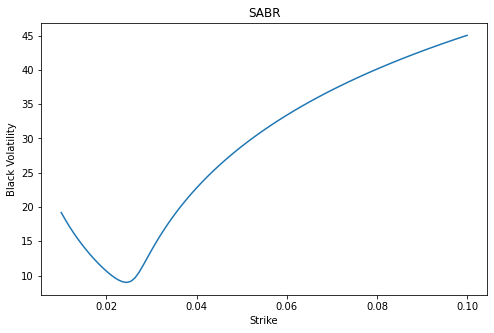

In [73]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility");

## Calibration - Fitting to the ATM Vol

In [74]:
blackVol = 0.22

In [75]:
f = 0.032

In [76]:
k = f

In [77]:
model.setAlphaFromATMBlackVol(blackVol, k, texp)

In [78]:
model

OBJECT TYPE: FinModelSABR
Alpha: 0.2486852107791646
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [79]:
model.blackVol(f, k, texp) * 100

22.000000000000004

The SABR model now fits the ATM volatility exactly

In [80]:
volsSABR = model.blackVol(f, strikes, texp) * 100

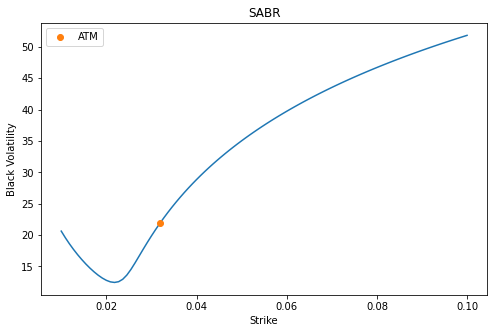

In [81]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend()

## Calibration - Fitting to the Any Strike Vol

In [82]:
blackVol = 0.26

In [83]:
f = 0.032

In [84]:
k = 0.040

In [85]:
model.setAlphaFromBlackVol(blackVol, f, k, texp)

In [86]:
model

OBJECT TYPE: FinModelSABR
Alpha: 0.21291738725874437
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [87]:
volsSABR = model.blackVol(f, strikes, texp) * 100

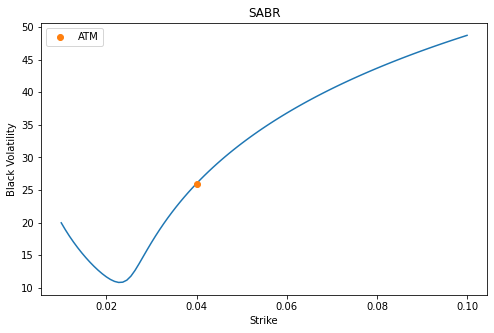

In [88]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend()

Copyright (c) 2020 Dominic O'Kane